# PROJET 03 : TRAITEMENT DE DONNEES NUTRITIONELLES  03/04

# Importation des librairies necessaires au projet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from langdetect import detect
#import re
#import langdetect
#from langdetect import detect
#from langdetect import detect_langs
%matplotlib inline
#To show all rows and colum
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# Importation du dataset avec uniquement les colonnes a utiliser 

In [2]:
df = pd.read_csv('df_final.csv', usecols=['code','url','creator','created_datetime','last_modified_datetime','product_name','brands','countries','main_category','energy_100g','fat_100g','cholesterol_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','vitamin-c_100g','nutrition-score-fr_100g','nutrition-score-uk_100g'])

C:\Users\AMC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head(2)

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries,main_category,energy_100g,fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17 09:17:46+00:00,2016-09-17 09:18:13+00:00,Farine de blé noir,Ferme t'y R'nao,en:FR,NaN,0.0,0.00,0.000,0.00,0.00,0.0,0.00,0.0,0.0000,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,Banana Chips Sweetened (Whole),NaN,US,NaN,2243.0,28.57,0.018,64.29,14.29,3.6,3.57,0.0,0.0214,14.0,14.0


In [5]:
df_head_01 = df

In [6]:
df_head_01.head(2)

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries,main_category,energy_100g,fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17 09:17:46+00:00,2016-09-17 09:18:13+00:00,Farine de blé noir,Ferme t'y R'nao,en:FR,NaN,0.0,0.00,0.000,0.00,0.00,0.0,0.00,0.0,0.0000,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,Banana Chips Sweetened (Whole),NaN,US,NaN,2243.0,28.57,0.018,64.29,14.29,3.6,3.57,0.0,0.0214,14.0,14.0


In [7]:
df_head_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303001 entries, 0 to 303000
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     303001 non-null  object 
 1   url                      303001 non-null  object 
 2   creator                  303001 non-null  object 
 3   created_datetime         303001 non-null  object 
 4   last_modified_datetime   303001 non-null  object 
 5   product_name             303001 non-null  object 
 6   brands                   289910 non-null  object 
 7   countries                302804 non-null  object 
 8   main_category            83437 non-null   object 
 9   energy_100g              303001 non-null  float64
 10  fat_100g                 303001 non-null  float64
 11  cholesterol_100g         303001 non-null  float64
 12  carbohydrates_100g       303001 non-null  float64
 13  sugars_100g              303001 non-null  float64
 14  fibe

# Arrangement des data types du dataset

In [8]:
from datetime import datetime

In [9]:
# Changement du format des dates en mode 'time'
df['created_datetime'] = pd.to_datetime(df['created_datetime'])
df['last_modified_datetime'] = pd.to_datetime(df['last_modified_datetime'])

In [10]:
# Exception dans le dataset
# Images ou emoji a l'interieur de la colonne 
df['product_name'].max()

'🍺'

In [11]:
# Arrangement de la casse de l'ensemble des string en mode 'lower'

In [12]:
df['product_name'] = df['product_name'].str.lower() 

In [13]:
df['creator'] = df['creator'].str.lower() 

In [14]:
df['brands'] = df['brands'].str.lower() 

In [15]:
df['countries'] = df['countries'].str.lower() 

In [16]:
df['main_category'] = df['main_category'].str.lower() 

In [17]:
df.head(2)

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries,main_category,energy_100g,fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17 09:17:46+00:00,2016-09-17 09:18:13+00:00,farine de blé noir,ferme t'y r'nao,en:fr,NaN,0.0,0.00,0.000,0.00,0.00,0.0,0.00,0.0,0.0000,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,banana chips sweetened (whole),NaN,us,NaN,2243.0,28.57,0.018,64.29,14.29,3.6,3.57,0.0,0.0214,14.0,14.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303001 entries, 0 to 303000
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   code                     303001 non-null  object             
 1   url                      303001 non-null  object             
 2   creator                  303001 non-null  object             
 3   created_datetime         303001 non-null  datetime64[ns, UTC]
 4   last_modified_datetime   303001 non-null  datetime64[ns, UTC]
 5   product_name             303001 non-null  object             
 6   brands                   289910 non-null  object             
 7   countries                302804 non-null  object             
 8   main_category            83437 non-null   object             
 9   energy_100g              303001 non-null  float64            
 10  fat_100g                 303001 non-null  float64            
 11  cholesterol_1

In [19]:
# Identification des valeurs uniques par type de colonne
# On voit clairement que le nombre de valeurs unique a traiter est assez important pour les variables categoriques
# essentiellement pour : creator, product_name, brands, countries, main_category
# Une uniformisation des noms pourrait reduire ce nombre

d=[]
for i in df.columns :
      
    d.append(
        {
            'colonne':i,
            'unique values':df[i].nunique()
        
        }
    )
p=pd.DataFrame(d)
p

,colonne,unique values
0,code,302956
1,url,303001
2,creator,3369
3,created_datetime,173106
4,last_modified_datetime,163884
5,product_name,214487
6,brands,53649
7,countries,1350
8,main_category,3451
9,energy_100g,3968


In [20]:
# Stockage intermediaire du dataset 
df_head_02 = df

In [21]:
df_head_02.head(2)

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries,main_category,energy_100g,fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17 09:17:46+00:00,2016-09-17 09:18:13+00:00,farine de blé noir,ferme t'y r'nao,en:fr,NaN,0.0,0.00,0.000,0.00,0.00,0.0,0.00,0.0,0.0000,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,banana chips sweetened (whole),NaN,us,NaN,2243.0,28.57,0.018,64.29,14.29,3.6,3.57,0.0,0.0214,14.0,14.0


In [22]:
df_stat_01 = df.describe()
df_stat_01

,energy_100g,fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,3.030010e+05,303001.000000,303001.000000,303001.000000,303001.000000,303001.000000,303001.000000,303001.000000,303001.000000,218427.000000,218427.000000
mean,9.700622e+02,10.082472,0.009537,25.443426,12.765692,1.876040,5.990023,1.697849,0.010838,9.150751,9.043387
std,5.994720e+03,16.478817,0.247119,29.524215,20.971589,10.558493,8.154915,117.790412,1.524940,9.052909,9.181334
min,0.000000e+00,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,-0.002100,-15.000000,-15.000000
25%,1.760000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,8.370000e+02,1.690000,0.000000,11.500000,3.330000,0.000000,3.330000,0.250000,0.000000,10.000000,9.000000
75%,1.594000e+03,15.330000,0.000000,50.590000,16.540000,2.400000,8.700000,1.178560,0.000000,16.000000,16.000000
max,3.251373e+06,714.290000,95.238000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,716.981100,40.000000,40.000000


In [23]:
# Determination des valeurs suivantes pour l'ensemble des colonnes :
# 1- Valeurs manquantes.
# 2- Value count
# 3- type
# 4- valeurs nulles (=0.)
d=[]
for i in df.columns:
    x = df[i].isna().sum()
    y = df[i].value_counts().sum()
    z = df[i].dtypes
    w = (df[i]==0).sum()
       
    d.append(
        {
            'variable':i,
            'count_of_values':y,
            'Null_value':x,
            'dtype' : z,
            'Zero_values':w
        }
    )
k=pd.DataFrame(d)
k

,variable,count_of_values,Null_value,dtype,Zero_values
0,code,303001,0,object,0
1,url,303001,0,object,0
2,creator,303001,0,object,0
3,created_datetime,303001,0,"datetime64[ns, UTC]",0
4,last_modified_datetime,303001,0,"datetime64[ns, UTC]",0
5,product_name,303001,0,object,0
6,brands,289910,13091,object,0
7,countries,302804,197,object,0
8,main_category,83437,219564,object,0
9,energy_100g,303001,0,float64,54158


In [24]:
# Liste des colonnes avec valeurs manquantes intiales
k.loc[k['Null_value']!=0,:]

,variable,count_of_values,Null_value,dtype,Zero_values
6,brands,289910,13091,object,0
7,countries,302804,197,object,0
8,main_category,83437,219564,object,0
18,nutrition-score-fr_100g,218427,84574,float64,12605
19,nutrition-score-uk_100g,218427,84574,float64,13423


In [25]:
# Resume des valeurs manquantes avant traitement
df_missing_01 = k.loc[k['Null_value']!=0,:]

In [26]:
df_missing_01

,variable,count_of_values,Null_value,dtype,Zero_values
6,brands,289910,13091,object,0
7,countries,302804,197,object,0
8,main_category,83437,219564,object,0
18,nutrition-score-fr_100g,218427,84574,float64,12605
19,nutrition-score-uk_100g,218427,84574,float64,13423


In [27]:
# Remplacement des valeurs manquantes :

In [29]:
df['countries'].fillna('not specified',inplace=True)
df['main_category'].fillna('not specified',inplace=True)
df['brands'].fillna('not specified',inplace=True)

In [30]:
# La nouvelle recap des valeurs manquantes qui affiche (0) pour l'ensemble des variables exceptes les colonnes 
# nutri-score qui ne seront pas remplacees 
d=[]
for i in df.columns:
    x = df[i].isna().sum()
    y = df[i].value_counts().sum()
    z = df[i].dtypes
    w = (df[i]==0).sum()
       
    d.append(
        {
            'variable':i,
            'count_of_values':y,
            'Null_value':x,
            'dtype' : z,
            'Zero_values':w
        }
    )
y=pd.DataFrame(d)
y

,variable,count_of_values,Null_value,dtype,Zero_values
0,code,303001,0,object,0
1,url,303001,0,object,0
2,creator,303001,0,object,0
3,created_datetime,303001,0,"datetime64[ns, UTC]",0
4,last_modified_datetime,303001,0,"datetime64[ns, UTC]",0
5,product_name,303001,0,object,0
6,brands,303001,0,object,0
7,countries,303001,0,object,0
8,main_category,303001,0,object,0
9,energy_100g,303001,0,float64,54158


In [31]:
# stockage de la recap des valeurs manquantes.
df_missing_02 = y
df_missing_02[df_missing_02['Null_value']!=0]

,variable,count_of_values,Null_value,dtype,Zero_values
18,nutrition-score-fr_100g,218427,84574,float64,12605
19,nutrition-score-uk_100g,218427,84574,float64,13423


In [32]:
# Traitement des valeurs aberrantes pour les colonnes numeriques
# Remplacement des valeurs negatives dans le dataset en omettant le signe (-) 

In [33]:
df.columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'brands', 'countries', 'main_category', 'energy_100g',
       'fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'vitamin-c_100g',
       'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')

In [43]:
negative_list = ['energy_100g', 'fat_100g','cholesterol_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','vitamin-c_100g']

In [44]:
# utilisation de la fonction abs(), valeur absolue pour l'elimination du signe (-) et la possibilite de garder les valeurs
df[negative_list]=df[negative_list].abs()
df.head(2)

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries,main_category,energy_100g,fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17 09:17:46+00:00,2016-09-17 09:18:13+00:00,farine de blé noir,ferme t'y r'nao,en:fr,not specified,0.0,0.00,0.000,0.00,0.00,0.0,0.00,0.0,0.0000,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00,banana chips sweetened (whole),not specified,us,not specified,2243.0,28.57,0.018,64.29,14.29,3.6,3.57,0.0,0.0214,14.0,14.0


In [40]:
num_list = (['energy_100g',
       'fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'vitamin-c_100g'])

In [41]:
df_num = df[num_list]

In [42]:
d=[]
for i in df_num.columns:
    x = df[i].isna().sum()
    y = df[i].value_counts().sum()
    z = df[i].dtypes
    w = (df[i]==0).sum()
    g = (df[i]>100).sum()
    t = (df[i]>900).sum()
    m = df[i].mean()
    p = df[i].max()
    l = df[i].min()
       
    d.append(
        {
            'variable':i,
            'count_of_values':y,
            'Null_value':x,
            'dtype' : z,
            'Zero_values':w,
            'min':l,
            'Mean':m,
            'max':p,
            'Outliers > 100':g,
            'Outliers-excess > 900':t
        }
    )
gg=pd.DataFrame(d)
gg

,variable,count_of_values,Null_value,dtype,Zero_values,min,Mean,max,Outliers > 100,Outliers-excess > 900
0,energy_100g,303001,0,float64,54158,0.0,970.062225,3.251373e+06,239877,146053
1,fat_100g,303001,0,float64,126588,0.0,10.082472,7.142900e+02,4,0
2,cholesterol_100g,303001,0,float64,248404,0.0,0.009537,9.523800e+01,0,0
3,carbohydrates_100g,303001,0,float64,84239,0.0,25.443426,2.916670e+03,18,1
4,sugars_100g,303001,0,float64,98018,0.0,12.765933,3.520000e+03,11,1
5,fiber_100g,303001,0,float64,172879,0.0,1.876084,5.380000e+03,4,1
6,proteins_100g,303001,0,float64,99816,0.0,5.998627,8.000000e+02,3,0
7,salt_100g,303001,0,float64,84420,0.0,1.697849,6.431280e+04,156,13
8,vitamin-c_100g,303001,0,float64,252767,0.0,0.010838,7.169811e+02,3,0


In [45]:
# Stockage du premier resultat sur les outliers
gg1 = gg
gg1

,variable,count_of_values,Null_value,dtype,Zero_values,min,Mean,max,Outliers > 100,Outliers-excess > 900
0,energy_100g,303001,0,float64,54158,0.0,970.062225,3.251373e+06,239877,146053
1,fat_100g,303001,0,float64,126588,0.0,10.082472,7.142900e+02,4,0
2,cholesterol_100g,303001,0,float64,248404,0.0,0.009537,9.523800e+01,0,0
3,carbohydrates_100g,303001,0,float64,84239,0.0,25.443426,2.916670e+03,18,1
4,sugars_100g,303001,0,float64,98018,0.0,12.765933,3.520000e+03,11,1
5,fiber_100g,303001,0,float64,172879,0.0,1.876084,5.380000e+03,4,1
6,proteins_100g,303001,0,float64,99816,0.0,5.998627,8.000000e+02,3,0
7,salt_100g,303001,0,float64,84420,0.0,1.697849,6.431280e+04,156,13
8,vitamin-c_100g,303001,0,float64,252767,0.0,0.010838,7.169811e+02,3,0


In [46]:
df2=df

In [47]:
df_num.columns

Index(['energy_100g', 'fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'vitamin-c_100g'],
      dtype='object')

In [50]:
# On definit une liste sans la colonne 'energy ' qui sera traite a part et differemment
no_energy_list = (['fat_100g','cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'vitamin-c_100g'])

In [51]:
df_num_01=df[no_energy_list]

In [52]:
df_num_01

,fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g
0,0.00,0.000,0.00,0.00,0.0,0.00,0.00000,0.0000
1,28.57,0.018,64.29,14.29,3.6,3.57,0.00000,0.0214
2,17.86,0.000,60.71,17.86,7.1,17.86,0.63500,0.0000
3,57.14,0.000,17.86,3.57,7.1,17.86,1.22428,0.0000
4,1.43,0.000,77.14,0.00,5.7,8.57,0.00000,0.0000
...,...,...,...,...,...,...,...,...
302996,0.00,0.000,0.00,0.00,0.0,0.00,0.00000,0.0000
302997,0.00,0.000,0.00,0.00,0.0,0.00,0.00000,0.0000
302998,0.00,0.000,0.00,0.00,0.0,0.00,0.00000,0.0000
302999,0.00,0.000,0.00,0.00,0.0,0.00,0.00000,0.0000


In [53]:
# Traitement des outliers 
# Remplacement de l'ensemble des valeurs superieures a 100 par la moyenne de chaque colonne
for i in df_num_01.columns :
    df.loc[df[i]>100] = df[i].mean()

In [54]:
# Check par rapport a une variable
df.loc[df['salt_100g']>100]

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,countries,main_category,energy_100g,fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


In [55]:
d=[]
for i in df_num.columns:
    x = df[i].isna().sum()
    y = df[i].value_counts().sum()
    z = df[i].dtypes
    w = (df[i]==0).sum()
    g = (df[i]>100).sum()
    t = (df[i]>900).sum()
    m = df[i].mean()
    p = df[i].max()
    l = df[i].min()
       
    d.append(
        {
            'variable':i,
            'count_of_values':y,
            'Null_value':x,
            'dtype' : z,
            'Zero_values':w,
            'min':l,
            'Mean':m,
            'max':p,
            'Outliers > 100':g,
            'Outliers-excess > 900':t
        }
    )
ggg=pd.DataFrame(d)
ggg

,variable,count_of_values,Null_value,dtype,Zero_values,min,Mean,max,Outliers > 100,Outliers-excess > 900
0,energy_100g,303001,0,float64,54039,0.0,968.594760,3251373.000,239814,146008
1,fat_100g,303001,0,float64,126443,0.0,10.079020,100.000,0,0
2,cholesterol_100g,303001,0,float64,248226,0.0,0.011853,95.238,0,0
3,carbohydrates_100g,303001,0,float64,84115,0.0,25.423275,100.000,0,0
4,sugars_100g,303001,0,float64,97887,0.0,12.748978,100.000,0,0
5,fiber_100g,303001,0,float64,172728,0.0,1.858506,100.000,0,0
6,proteins_100g,303001,0,float64,99678,0.0,5.994459,100.000,0,0
7,salt_100g,303001,0,float64,84411,0.0,1.328630,100.000,0,0
8,vitamin-c_100g,303001,0,float64,252598,0.0,0.009260,100.000,0,0


In [56]:
df.describe()

,energy_100g,fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-c_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,3.030010e+05,303001.000000,303001.000000,303001.000000,303001.000000,303001.000000,303001.000000,303001.00000,303001.000000,218544.000000,218544.000000
mean,9.685948e+02,10.079020,0.011853,25.423275,12.748978,1.858506,5.994459,1.32863,0.009260,9.144766,9.037419
std,5.976710e+03,16.412787,0.296751,29.040713,19.968429,3.956454,7.932887,5.74603,0.372695,9.052228,9.180496
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-15.000000,-15.000000
25%,1.760000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000
50%,8.370000e+02,1.698624,0.000000,11.500000,3.330000,0.000000,3.330000,0.25000,0.000000,10.000000,9.000000
75%,1.594000e+03,15.330000,0.000000,50.510000,16.500000,2.400000,8.700000,1.17856,0.000000,16.000000,16.000000
max,3.251373e+06,100.000000,95.238000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,40.000000,40.000000


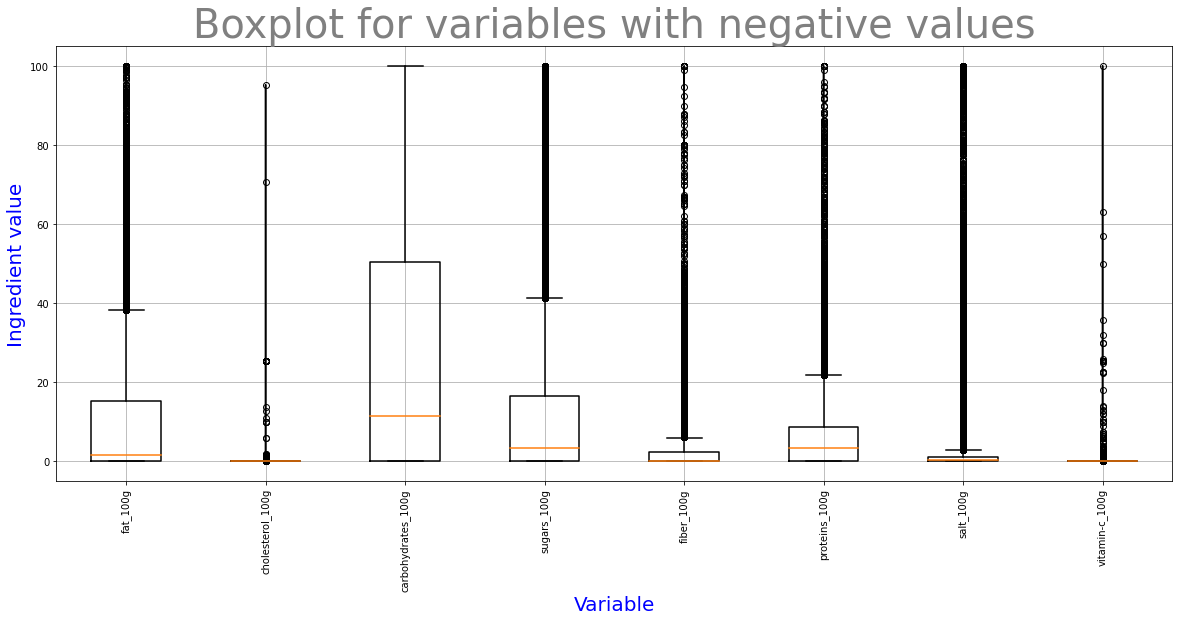

In [57]:
# Exemple des de la distribution des valeurs en box plot
ax = df[no_energy_list].plot(kind='box',
             color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
             boxprops=dict(linestyle='-', linewidth=1.5),
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             showfliers=True, grid=True, rot=90, figsize = (20,8))
     
ax.set_title("Boxplot for variables with negative values", fontsize=40, color='gray')
ax.set_xlabel('Variable', fontsize=20, color='blue')
ax.set_ylabel('Ingredient value', fontsize=20, color='blue')
plt.show()

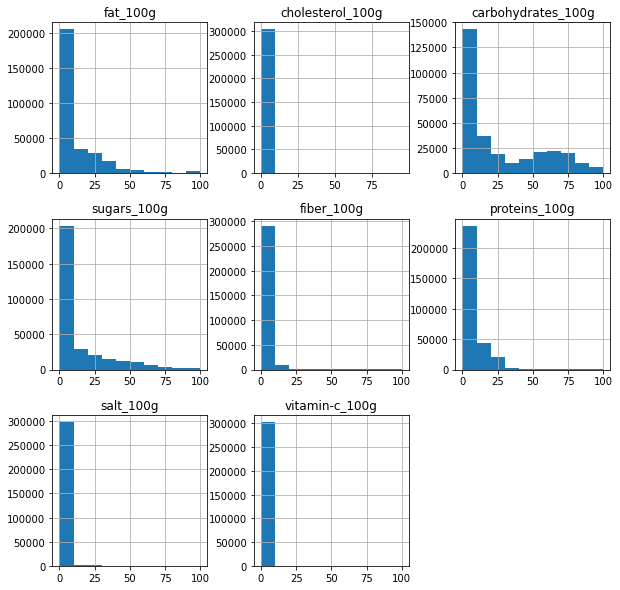

In [64]:
# Histogrammes qui permettent d'observer la distribution des donnees par rapport a chaque variable
df[no_energy_list].hist(figsize=(10,10))
#plt.hist()
plt.show()

In [65]:
df4 = df

In [66]:
# Sauvegarde du fichier df / 
df4.to_csv('df4.csv', index=False)